<a href="https://colab.research.google.com/github/jahnavi2704/GenAITraining/blob/main/submission10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
! rm -r "/content/Hackathon_folder"

In [2]:
!unzip "/content/Hackathon_folder.zip"

Archive:  /content/Hackathon_folder.zip
   creating: Hackathon_folder/
  inflating: Hackathon_folder/sample_submission.csv  
  inflating: Hackathon_folder/test.csv  
   creating: Hackathon_folder/train/
   creating: Hackathon_folder/train/images/
  inflating: Hackathon_folder/train/images/0.jpg  
  inflating: Hackathon_folder/train/images/1.jpg  
  inflating: Hackathon_folder/train/images/10.jpg  
  inflating: Hackathon_folder/train/images/100.jpg  
  inflating: Hackathon_folder/train/images/1000.jpg  
  inflating: Hackathon_folder/train/images/1001.jpg  
  inflating: Hackathon_folder/train/images/1002.jpg  
  inflating: Hackathon_folder/train/images/1003.jpg  
  inflating: Hackathon_folder/train/images/1004.jpg  
  inflating: Hackathon_folder/train/images/1005.jpg  
  inflating: Hackathon_folder/train/images/1006.jpg  
  inflating: Hackathon_folder/train/images/1007.jpg  
  inflating: Hackathon_folder/train/images/1008.jpg  
  inflating: Hackathon_folder/train/images/1009.jpg  
  infl

In [3]:
# data extraction, data engineering, feature engineering.
import pandas as pd
import os, shutil

In [4]:
# Load the CSV file
train_csv = '/content/Hackathon_folder/train/train.csv'
data = pd.read_csv(train_csv)
image_names = data['image_names'].tolist()
labels = data['emergency_or_not'].tolist()
print(image_names)
print(labels)

['1503.jpg', '1420.jpg', '1764.jpg', '1117.jpg', '45.jpg', '2313.jpg', '1657.jpg', '294.jpg', '999.jpg', '588.jpg', '1912.jpg', '736.jpg', '1106.jpg', '1939.jpg', '1833.jpg', '436.jpg', '741.jpg', '2133.jpg', '393.jpg', '907.jpg', '534.jpg', '30.jpg', '1994.jpg', '1526.jpg', '1114.jpg', '1176.jpg', '1304.jpg', '1972.jpg', '2084.jpg', '1231.jpg', '1336.jpg', '2110.jpg', '344.jpg', '556.jpg', '1242.jpg', '680.jpg', '744.jpg', '1071.jpg', '352.jpg', '91.jpg', '1058.jpg', '1914.jpg', '1091.jpg', '261.jpg', '1742.jpg', '748.jpg', '755.jpg', '764.jpg', '567.jpg', '1915.jpg', '1658.jpg', '1871.jpg', '913.jpg', '2141.jpg', '1619.jpg', '300.jpg', '1590.jpg', '2042.jpg', '1090.jpg', '1763.jpg', '315.jpg', '1840.jpg', '453.jpg', '601.jpg', '175.jpg', '1387.jpg', '1133.jpg', '37.jpg', '123.jpg', '1234.jpg', '394.jpg', '1775.jpg', '2217.jpg', '39.jpg', '462.jpg', '1989.jpg', '2075.jpg', '331.jpg', '1546.jpg', '194.jpg', '2211.jpg', '2236.jpg', '634.jpg', '322.jpg', '1870.jpg', '266.jpg', '1057.jpg'

In [5]:
all_images = "/content/Hackathon_folder/train/images/"

train_images = "/content/Hackathon_folder/train/train_images/"
if not os.path.exists(train_images):
    os.makedirs(train_images)

emergency_images = "/content/Hackathon_folder/train/train_images/1/"
non_emergency_images = "/content/Hackathon_folder/train/train_images/0/"
if not os.path.exists(emergency_images):
    os.makedirs(emergency_images)
if not os.path.exists(non_emergency_images):
    os.makedirs(non_emergency_images)

for image in image_names:
  if labels[image_names.index(image)] == 1:
    shutil.move(all_images+image, emergency_images+image)
  else:
    shutil.move(all_images+image, non_emergency_images+image)

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import random_split
import torch.optim.lr_scheduler as lr_scheduler
import torchvision.models as models
from PIL import Image

In [7]:
# Load the pre-trained ResNet50 model
resnet50 = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 162MB/s]


In [8]:
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet mean/std
])
train_dataset = datasets.ImageFolder(root=train_images, transform=train_transforms)
# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Split training data into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

In [9]:
# Extract layers from ResNet50
conv1 = resnet50.conv1
bn1 = resnet50.bn1
pool1 = resnet50.maxpool

# ResNet50 has bottleneck blocks, we need to extract them correctly
layer1 = resnet50.layer1
layer2 = resnet50.layer2
layer3 = resnet50.layer3
layer4 = resnet50.layer4

# Custom fully connected layers
dropout1 = nn.Dropout(p=0.5)
dropout2 = nn.Dropout(p=0.5)
fc1 = nn.Linear(2048, 512)  # Adjusted for ResNet50 output
fc2 = nn.Linear(512, 128)
fc3 = nn.Linear(128, 1)  # 1 class (emergency/non-emergency)

In [10]:
model = nn.Sequential(
    conv1,
    bn1,
    nn.ReLU(),
    pool1,
    layer1,
    layer2,
    layer3,
    layer4,
    nn.AdaptiveAvgPool2d((1, 1)),  # ResNet50 uses adaptive average pooling
    nn.Flatten(),
    fc1,
    nn.LeakyReLU(negative_slope=0.01),
    dropout1,
    fc2,
    nn.LeakyReLU(negative_slope=0.01),
    dropout2,
    fc3
)

In [11]:
# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # for classification
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

# Define the learning rate scheduler
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

In [ ]:
# Training the model
epochs = 15
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    total = 0
    correct = 0
    image_counter = 0

    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels.float().unsqueeze(1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Convert logits to binary predictions
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels.float().unsqueeze(1)).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

    # Validation
    model.eval()
    val_loss = 0.0
    val_total = 0
    val_correct = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels.float().unsqueeze(1))
            val_loss += loss.item()

            # Convert logits to binary predictions
            predicted = (outputs > 0.5).float()
            val_total += labels.size(0)
            val_correct += (predicted == labels.float().unsqueeze(1)).sum().item()

    val_loss /= len(val_loader)
    # Step the scheduler with validation loss
    scheduler.step(val_loss)
    val_accuracy = 100 * val_correct / val_total
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

Epoch [1/15], Loss: 0.4357, Accuracy: 80.58%
Validation Loss: 4.1997, Validation Accuracy: 82.26%
Epoch [2/15], Loss: 0.3556, Accuracy: 85.86%
Validation Loss: 0.3866, Validation Accuracy: 85.32%
Epoch [3/15], Loss: 0.3000, Accuracy: 88.99%
Validation Loss: 0.4488, Validation Accuracy: 74.92%
Epoch [4/15], Loss: 0.2674, Accuracy: 88.61%
Validation Loss: 0.3628, Validation Accuracy: 87.16%


In [38]:
test_images = "/content/Hackathon_folder/train/test_images/"
if not os.path.exists(test_images):
    os.makedirs(test_images)

# Load the Test CSV file
test_csv = "/content/Hackathon_folder/test.csv"
data = pd.read_csv(test_csv)
test_image_names = data['image_names'].tolist()
print(test_image_names)

for image in test_image_names:
  shutil.move(all_images+image, test_images+image)

['1960.jpg', '668.jpg', '2082.jpg', '808.jpg', '1907.jpg', '350.jpg', '1557.jpg', '111.jpg', '1952.jpg', '1466.jpg', '2071.jpg', '1891.jpg', '1900.jpg', '1927.jpg', '1414.jpg', '134.jpg', '1037.jpg', '56.jpg', '208.jpg', '629.jpg', '979.jpg', '2099.jpg', '332.jpg', '1814.jpg', '1094.jpg', '1886.jpg', '342.jpg', '2134.jpg', '1465.jpg', '482.jpg', '229.jpg', '1078.jpg', '611.jpg', '1349.jpg', '1805.jpg', '1947.jpg', '299.jpg', '463.jpg', '2154.jpg', '1244.jpg', '581.jpg', '218.jpg', '1553.jpg', '1025.jpg', '1591.jpg', '1132.jpg', '2117.jpg', '1795.jpg', '2254.jpg', '1950.jpg', '507.jpg', '445.jpg', '1501.jpg', '2349.jpg', '678.jpg', '1604.jpg', '792.jpg', '879.jpg', '1779.jpg', '2156.jpg', '44.jpg', '686.jpg', '1311.jpg', '2192.jpg', '440.jpg', '1047.jpg', '254.jpg', '479.jpg', '282.jpg', '2339.jpg', '2066.jpg', '1379.jpg', '759.jpg', '2262.jpg', '672.jpg', '2036.jpg', '279.jpg', '596.jpg', '486.jpg', '651.jpg', '1138.jpg', '881.jpg', '433.jpg', '1640.jpg', '1293.jpg', '2140.jpg', '2097.

In [42]:
test_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# test_dataset = datasets.ImageFolder(root="/content/Hackathon_folder/train/test_images/", transform=test_transforms)
# test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [44]:
def eval_image(test_image_name):
  image_path = f"/content/Hackathon_folder/train/test_images/{test_image_name}"
  image = Image.open(image_path)
  image = test_transforms(image).unsqueeze(0)  # Apply transformations and add batch dimension
  # Evaluate on the test set
  model.eval()
  with torch.no_grad():
      outputs = model(image).squeeze()
      predicted = (outputs > 0.5).int()
  return predicted.item()

In [45]:
#test all the images in csv file
test_csv = "/content/Hackathon_folder/test.csv"
test = pd.read_csv(test_csv)
test['emergency_or_not'] = None
for index, row in test.iterrows():
    image_name = row['image_names']
    test.at[index, 'emergency_or_not'] = eval_image(image_name)
print(test.head())
test.to_csv(test_csv, index=False)

  image_names emergency_or_not
0    1960.jpg                0
1     668.jpg                1
2    2082.jpg                0
3     808.jpg                1
4    1907.jpg                0


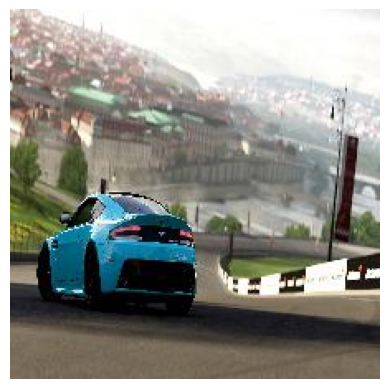

In [ ]:
import matplotlib.pyplot as plt
# Display the image with prediction
plt.imshow(Image.open(image_path))
plt.axis("off")
plt.show()